In [27]:
import sys
import os
import shutil
import datetime
import re
import pandas as pd
from collections import Counter
#sys.path.append(os.path.abspath("/home/jose/Dropbox/Doktorarbeit/"))
#from reading_robot import load_data, tei2text, text2features, classify, process_labels, describe_data,feature_analysis, cull_data, st_tests, metadata2numbers, cluster, call_stylo, prepare_subcorpus
import scipy.stats as stats
import seaborn as sns
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
%matplotlib inline
from shutil import copyfile
import numpy as np
import glob

# Read Data

In [28]:
summary_combined_df = pd.read_csv("./../data/summaries.tsv",sep="\t",index_col=0).round(2)
summary_combined_df

,number_texts,number_authors,mean_number_text_author,std_number_text_author,mean_length,std_length,distribution_authors_texts
16-17-poesia,82,41,2.0,0.00,4818.85,6630.09,LuisCarrilloySotomayor 2\nJosephdeLitalayC...
16-17-prosa,24,5,4.8,3.42,65924.92,75740.65,Vives-Juan-Luis 9\nMejía 8\nVa...
16-17-teatro,38,10,3.8,1.62,13011.58,4041.93,Lope 6\nCalderon 6\nTirso ...
19-20-cuent-esp,17,5,3.4,0.89,40822.24,22187.59,Clarin 4\nMiro 4\nBazan ...
19-20-nov-esp,39,13,3.0,0.00,64642.72,35161.19,Valera 3\nBazan 3\nUnamuno ...
19-20-nov-hisp,24,8,3.0,0.00,47010.88,35543.78,Holmberg 3\nCambaceres 3\nCuellar ...
19-20-poesia,64,32,2.0,0.00,1837.72,689.40,Ros-de-Olano-Antonio 2\nBaralt-R...


In [29]:
df = pd.read_csv("./../results/202210_all_filtered.tsv", sep="\t", index_col=0)

In [30]:
df["distances"].value_counts()

dist.minmax      1094
dist.eder        1094
dist.delta       1094
dist.wurzburg    1094
Name: distances, dtype: int64

In [31]:
df["corpus"].unique()

array(['novelas-hispanoamericanas', 'disco', 'prosa-SdO',
       'Poesia_SiglodeOro', 'cuentos-espanoles', 'teatro-sgo',
       'novelas-espanolas'], dtype=object)

In [32]:
df["corpus"].replace(
    {
        'prosa-SdO': "16-17-prosa",
        
        'Poesia_SiglodeOro': "16-17-poesia",
        'Poesia-SdO': "16-17-poesia",
        'teatro-sgo': "16-17-teatro",
        'teatro-sgo': "16-17-teatro",
        "disco" : "19-20-poesia",
        "novelas-espanolas" : "19-20-nov-esp",
        "novelas-hispanoamericanas" : "19-20-nov-hisp",
        "cuentos-espanoles" : "19-20-cuent-esp"
        }, inplace=True)

In [33]:
df

,corpus,version,mfw,features,ngrams,distances,media
0,19-20-nov-hisp,combination,100,w,4,dist.minmax,56.607143
1,19-20-poesia,combination,100,c,1,dist.minmax,35.441089
2,19-20-poesia,combination,100,c,3,dist.eder,36.600046
3,19-20-poesia,combination,100,c,4,dist.eder,36.613470
4,19-20-poesia,combination,100,c,4,dist.minmax,37.338606
...,...,...,...,...,...,...,...
6265,19-20-poesia,fusion,5000,w,2,dist.delta,42.506842
6267,19-20-poesia,only-tokens,5000,w,1,dist.wurzburg,75.415982
6268,16-17-poesia,only-tokens,5000,w,1,dist.eder,87.285741
6269,16-17-poesia,only-tokens,5000,w,1,dist.wurzburg,87.234585


In [34]:
df.rename(columns={"media": "mean"}, inplace=True)

In [35]:
df["distances"].replace(
    {
        'dist.wurzburg': "dist.delta.cosine",
        'dist.eder': "dist.delta.eder",
        'dist.delta': "dist.delta.burrows",
        }, inplace=True)

In [36]:
df["distances"].unique()

array(['dist.minmax', 'dist.delta.eder', 'dist.delta.cosine',
       'dist.delta.burrows'], dtype=object)

In [37]:
df["features"].replace(
    {
        'c': "character",
        'w': "word",
        }, inplace=True)

In [38]:
df.sort_values(by=["corpus", "mfw"], inplace=True)

In [39]:
df.groupby(["corpus"])["mean"].mean()

corpus
16-17-poesia       54.458777
16-17-prosa        64.476010
16-17-teatro       61.121634
19-20-cuent-esp    87.801437
19-20-nov-esp      78.457122
19-20-nov-hisp     78.314983
19-20-poesia       46.148449
Name: mean, dtype: float64

In [40]:
summary_combined_df["results_mean"] = df.groupby(["corpus"])["mean"].mean()

In [41]:
summary_combined_df

,number_texts,number_authors,mean_number_text_author,std_number_text_author,mean_length,std_length,distribution_authors_texts,results_mean
16-17-poesia,82,41,2.0,0.00,4818.85,6630.09,LuisCarrilloySotomayor 2\nJosephdeLitalayC...,54.458777
16-17-prosa,24,5,4.8,3.42,65924.92,75740.65,Vives-Juan-Luis 9\nMejía 8\nVa...,64.476010
16-17-teatro,38,10,3.8,1.62,13011.58,4041.93,Lope 6\nCalderon 6\nTirso ...,61.121634
19-20-cuent-esp,17,5,3.4,0.89,40822.24,22187.59,Clarin 4\nMiro 4\nBazan ...,87.801437
19-20-nov-esp,39,13,3.0,0.00,64642.72,35161.19,Valera 3\nBazan 3\nUnamuno ...,78.457122
19-20-nov-hisp,24,8,3.0,0.00,47010.88,35543.78,Holmberg 3\nCambaceres 3\nCuellar ...,78.314983
19-20-poesia,64,32,2.0,0.00,1837.72,689.40,Ros-de-Olano-Antonio 2\nBaralt-R...,46.148449


In [42]:
summary_combined_df["results_tokens_word_1gram_mean"] = df.loc[(df["version"] == "only-tokens") & (df["features"] == "word")  & (df["ngrams"] == 1)].groupby(["corpus"])["mean"].mean()

In [43]:
factors = ['number_texts',
 'number_authors',
 'mean_number_text_author',
 'std_number_text_author',
 'mean_length',
 'std_length']


<AxesSubplot:title={'center':'correlation between number_texts and the results'}, xlabel='number_texts', ylabel='results_mean'>

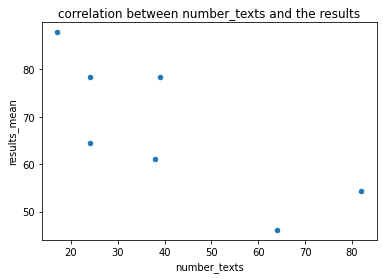

In [44]:
summary_combined_df.plot.scatter("number_texts", "results_mean", title="correlation between number_texts and the results")

In [45]:
from  scipy import stats

In [46]:
#r, p_value = stats.pearsonr(summary_combined_df[factor], summary_combined_df["results_media"])
#r

In [47]:
summary_combined_df

,number_texts,number_authors,mean_number_text_author,std_number_text_author,mean_length,std_length,distribution_authors_texts,results_mean,results_tokens_word_1gram_mean
16-17-poesia,82,41,2.0,0.00,4818.85,6630.09,LuisCarrilloySotomayor 2\nJosephdeLitalayC...,54.458777,71.332810
16-17-prosa,24,5,4.8,3.42,65924.92,75740.65,Vives-Juan-Luis 9\nMejía 8\nVa...,64.476010,71.101190
16-17-teatro,38,10,3.8,1.62,13011.58,4041.93,Lope 6\nCalderon 6\nTirso ...,61.121634,72.075397
19-20-cuent-esp,17,5,3.4,0.89,40822.24,22187.59,Clarin 4\nMiro 4\nBazan ...,87.801437,90.285714
19-20-nov-esp,39,13,3.0,0.00,64642.72,35161.19,Valera 3\nBazan 3\nUnamuno ...,78.457122,85.779221
19-20-nov-hisp,24,8,3.0,0.00,47010.88,35543.78,Holmberg 3\nCambaceres 3\nCuellar ...,78.314983,86.279762
19-20-poesia,64,32,2.0,0.00,1837.72,689.40,Ros-de-Olano-Antonio 2\nBaralt-R...,46.148449,57.033262


In [48]:
outdir = "./../visualisations/"

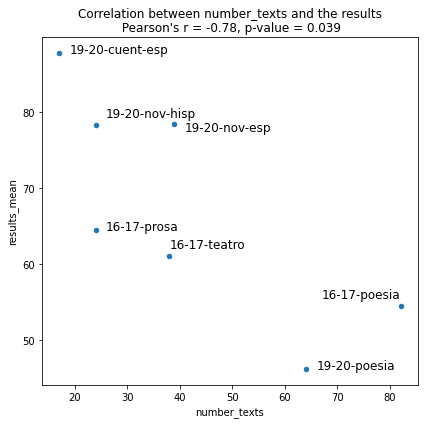

In [49]:
factor = "number_texts"
r, p_value = stats.pearsonr(summary_combined_df[factor], summary_combined_df["results_mean"])

summary_combined_df.plot.scatter(factor, "results_mean", title="Correlation between " + factor + " and the results\n Pearson's r = " + str(round(r, 2)) + ", p-value = " + str(round(p_value, 3)), figsize=(6,6))

for index, row  in summary_combined_df.iterrows():
    if index == "16-17-poesia":
        horizontal_value = row["number_texts"] - 15
    elif index == "16-17-teatro":
        horizontal_value = row["number_texts"] 
    else:
        horizontal_value = row["number_texts"] + 2
    
    if index == "19-20-nov-esp":
        vertical_value = row["results_mean"] - 1
    elif index == "19-20-nov-hisp":
        vertical_value = row["results_mean"] + 1
    elif index == "16-17-teatro":
        vertical_value = row["results_mean"] +1
    elif index == "16-17-poesia":
        vertical_value = row["results_mean"] +1
    else:
        vertical_value = row["results_mean"]

    plt.text(horizontal_value ,vertical_value, index, fontsize=12)

plt.tight_layout()
plt.savefig(outdir + "scatter_number-texts_results.png", dpi=300, format="png", facecolor='white', transparent=False)



In [50]:
summary_combined_df

,number_texts,number_authors,mean_number_text_author,std_number_text_author,mean_length,std_length,distribution_authors_texts,results_mean,results_tokens_word_1gram_mean
16-17-poesia,82,41,2.0,0.00,4818.85,6630.09,LuisCarrilloySotomayor 2\nJosephdeLitalayC...,54.458777,71.332810
16-17-prosa,24,5,4.8,3.42,65924.92,75740.65,Vives-Juan-Luis 9\nMejía 8\nVa...,64.476010,71.101190
16-17-teatro,38,10,3.8,1.62,13011.58,4041.93,Lope 6\nCalderon 6\nTirso ...,61.121634,72.075397
19-20-cuent-esp,17,5,3.4,0.89,40822.24,22187.59,Clarin 4\nMiro 4\nBazan ...,87.801437,90.285714
19-20-nov-esp,39,13,3.0,0.00,64642.72,35161.19,Valera 3\nBazan 3\nUnamuno ...,78.457122,85.779221
19-20-nov-hisp,24,8,3.0,0.00,47010.88,35543.78,Holmberg 3\nCambaceres 3\nCuellar ...,78.314983,86.279762
19-20-poesia,64,32,2.0,0.00,1837.72,689.40,Ros-de-Olano-Antonio 2\nBaralt-R...,46.148449,57.033262


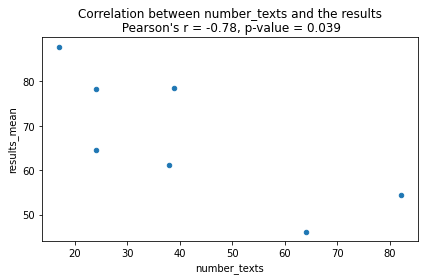

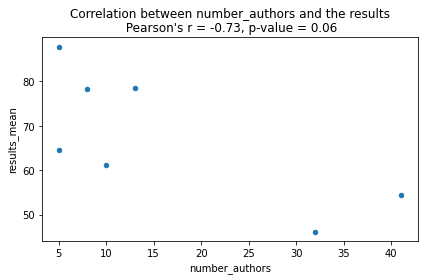

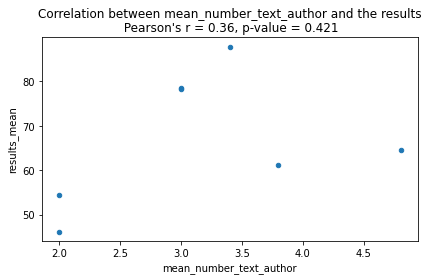

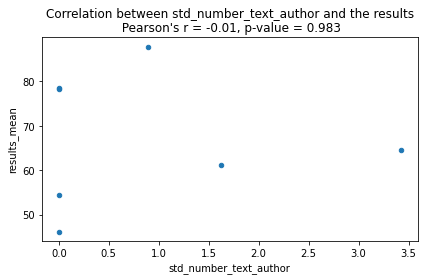

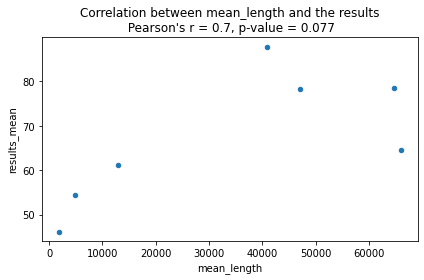

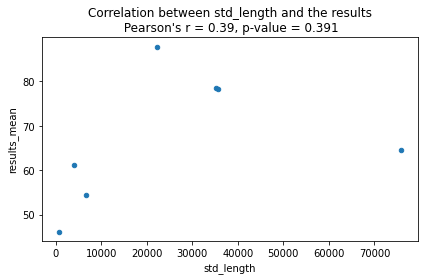

In [51]:
for factor in factors:

    r, p_value = stats.pearsonr(summary_combined_df[factor], summary_combined_df["results_mean"])
    summary_combined_df.plot.scatter(factor, "results_mean", title="Correlation between " + factor + " and the results\n Pearson's r = " + str(round(r, 2)) + ", p-value = " + str(round(p_value, 3)))
    plt.tight_layout()
    plt.savefig(outdir + "scatter_" + factor + "_results.png", dpi=300, format="png", facecolor='white', transparent=False)



    """
    r, p_value = stats.pearsonr(summary_combined_df[factor], summary_combined_df["results_tokens_word_1gram_mean"])
    summary_combined_df.plot.scatter(factor, "results_tokens_word_1gram_mean", title="Correlation between " + factor + " and the results (tokens, 1gram)\n Pearson's r = " + str(round(r, 2)) + ", p-value = " + str(round(p_value, 3)))
    plt.tight_layout()
    plt.savefig(outdir + "scatter_" + factor + "_results_1gram_tokens.png", dpi=300, format="png", facecolor='white', transparent=False)
    """


In [53]:
summary_combined_df.shape

(7, 9)